# Modelling SentinelOne's Employee Stock Purchase Plan

In [1]:
import warnings

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("ticks")

warnings.filterwarnings("ignore", category=UserWarning)

DISCOUNT = 0.15  # Discount on stock price
MONTHLY_INVESTMENT = 1300  # About £1,000
PERIOD = 6  # Months
TAX_RATE = 0.45  # UK additional rate
TOTAL_INVESTMENT = MONTHLY_INVESTMENT * PERIOD
PRICE_MIN = 15
PRICE_MAX = 30

In [2]:
initial_price = np.arange(PRICE_MAX, PRICE_MIN - 0.1, -1)
final_price = np.arange(PRICE_MIN, PRICE_MAX + 0.1, 1)
initial_price_matrix = np.tile(initial_price[:, np.newaxis], len(final_price))
final_price_matrix = np.tile(final_price, (len(initial_price), 1))
purchase_price = np.where(final_price_matrix < initial_price_matrix, final_price_matrix, initial_price_matrix) * (1 - DISCOUNT)
shares_purchased = np.floor(TOTAL_INVESTMENT / purchase_price)
profit_after_tax = shares_purchased * (final_price_matrix - purchase_price) * (1 - TAX_RATE)

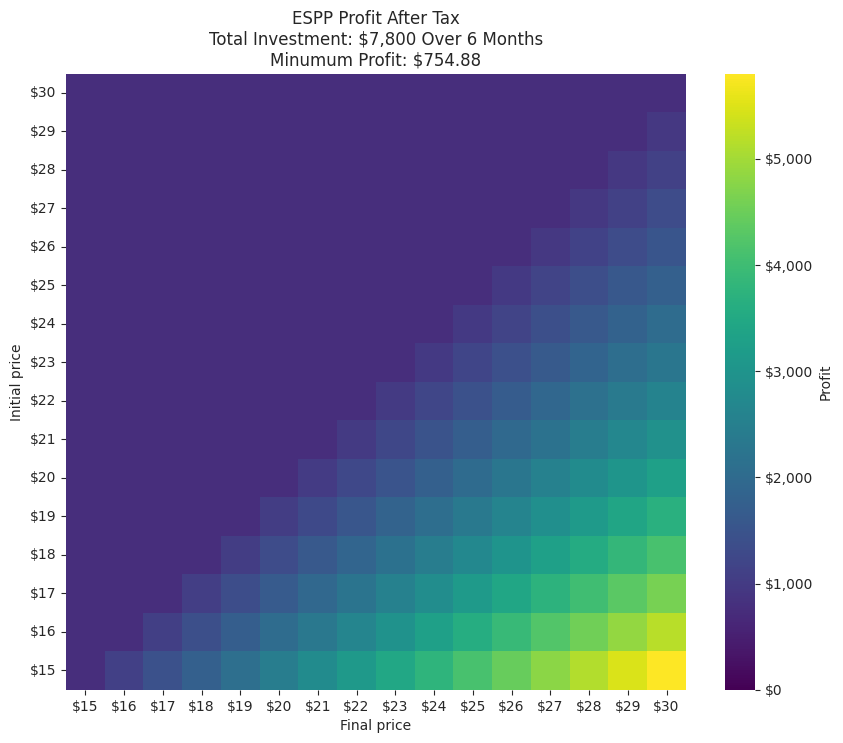

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    profit_after_tax,
    xticklabels=final_price,
    yticklabels=initial_price,
    annot=False,
    cmap="viridis",
    cbar_kws={"label": "Profit"},
    vmin=0,
    vmax=np.ceil(profit_after_tax.max() / 100) * 100,
    ax=ax,
)

# Set colorbar labels
cbar = ax.collections[0].colorbar
cbar.set_ticklabels(["${:,g}".format(x) for x in cbar.get_ticks()])

# # Set corresponding tick labels
ax.set_xticklabels([f"${final_price[i]:.0f}" for i, _ in enumerate(ax.get_xticks())])
ax.set_yticklabels([f"${initial_price[i]:.0f}" for i, _ in enumerate(ax.get_yticks())])

# Rotate x tick labels
ax.tick_params(axis="x", rotation=0)
ax.tick_params(axis="y", rotation=0)

# Set axis labels
ax.set_xlabel("Final price")
ax.set_ylabel("Initial price")
ax.set_title(f"ESPP Profit After Tax\nTotal Investment: ${TOTAL_INVESTMENT:,g} Over {PERIOD} Months\nMinumum Profit: ${np.min(profit_after_tax):,.2f}")

plt.show()